In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
file_path='/content/drive/My Drive/datasets/binary_classification_train.csv'
data=pd.read_csv(file_path)
matrix = data.iloc[:, 1:].values

Mounted at /content/drive


 0: J:0.992824187518223, w:[1.13670841e-05 7.92121390e-07 2.08206372e-05 2.21917172e-05
 3.88505200e-05], b: 0.9958937892137
 100: J:0.6721970706324245, w:[ 0.0011469  -0.0004028   0.00171518 -0.01306563  0.00292968], b: 0.6316945783968285
 200: J:0.51993772031336, w:[ 0.00204615 -0.0012054   0.00298213 -0.03860006  0.00434457], b: 0.35674729979777703
 300: J:0.440432014409775, w:[ 0.00267478 -0.00208094  0.00403782 -0.06501931  0.00498438], b: 0.14785861840870868
 400: J:0.39456246773546433, w:[ 0.00311922 -0.00293019  0.00494831 -0.08972217  0.00523915], b: -0.016003508166500674
 500: J:0.3658752522582998, w:[ 0.00344808 -0.00371991  0.00574214 -0.11242592  0.00529534], b: -0.1485037493471641
 600: J:0.3467915944367202, w:[ 0.00370262 -0.00444039  0.00643742 -0.13331051  0.00524498], b: -0.25830175513867315
 700: J:0.33348222452397785, w:[ 0.00390688 -0.00509111  0.00704806 -0.15260005  0.00513628], b: -0.35105647029702614
 800: J:0.32385333120217663, w:[ 0.00407527 -0.00567524  0.00

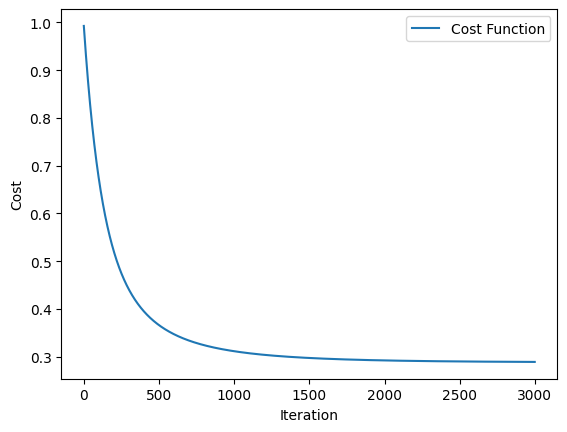

J_cv: 0.28393820046787294
accuracy: 93.275


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
matrix[:, :20] = (matrix[:, :20] - np.mean(matrix[:, :20], axis=0)) / np.std(matrix[:, :20], axis=0)


w=np.zeros(20)
b=1
l=0.01
alp=0.01
y1 = np.zeros(32000)
n = 3000
j=np.zeros(n)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))
for m in range(n):
    z=np.dot(matrix[:32000, :20], w) + b
    y1=sigmoid(z)
    e1=y1-matrix[:32000, 20]
    j[m]=-np.sum(matrix[:32000, 20]*np.log(y1)+(1 - matrix[:32000, 20])*np.log(1-y1))/32000+l*np.sum(w**2)
    dj_dw=np.dot(e1, matrix[:32000, :20])/32000+2*w*l
    dj_db=np.sum(e1)/32000
    w-=alp*dj_dw
    b-=alp*dj_db
    if m % 100 == 0:
        print(f" {m}: J:{j[m]}, w:{ w[:5]}, b: {b}")

p=np.zeros(n)
for i in range(n):
   p[i]=i
plt.plot(p, j)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend(["Cost Function"])
plt.show()

y1_cv=sigmoid(np.dot(matrix[32000:,:20], w)+b)
print("J_cv:", -np.mean(matrix[32000:, 20]*np.log(y1_cv)+(1 - matrix[32000:, 20])*np.log(1-y1_cv)) + l*np.sum(w**2))


y2_cv=sigmoid(np.dot(matrix[:,:20], w)+b)
count=0
for i in range(48000):
  if y2_cv[i]>=0.5:
    y2_cv[i]=1
  else:
    y2_cv[i]=0
  if y2_cv[i]!=matrix[i, 20]:
    count+=1
print("accuracy:" , 100-((count*100)/48000))


On checking accuracy, we are getting an accuracy of 93.275% on the entire training dataset


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
file_path1='/content/drive/My Drive/datasets/binary_classification_test.csv'
data1=pd.read_csv(file_path1)
matrix1 = data1.iloc[:, 1:].values

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
predictions=sigmoid(np.dot(matrix1[:,:20], w)+b)
for i in range(12000):
  if predictions[i]>=0.5:
    predictions[i]=1
  else:
    predictions[i]=0